# plot_MJOPhase_westerlyDays.ipynb

#### Robert Peal November 2024

- Plot the fraction of days in each MJO phase where there is a westerly at different locations
- Plot is divided into seasons


In [2]:
import xarray as xr
import sys
sys.path.append("/home/atuin/c104fa/c104fa10/utils")
import tctools2 as tct
import numpy as np
import matplotlib.pyplot as plt
import pyproj
pyproj.datadir.set_data_dir("/home/atuin/c104fa/c104fa10/software/conda/envs/atmos_sci/share/proj") ## This line is needed to allow geopandas imports
import cartopy.crs as ccrs
import pandas as pd
import pickle

/home/atuin/c104fa/c104fa10/software/conda/envs/atmos_sci/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


#### User options

In [3]:
# Years and months
years = np.arange(2018,2023)
months = np.arange(1,13)

# # Path to save the fractions to
# fracSaveLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/mjoClassFracs.{years[0]}.{years[-1]}.nc"
# # Path to save the days in each class to
# totalSaveLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/mjoClassTotals.{years[0]}.{years[-1]}.pkl"

# # Path to nc files with westerlies in
# westerlyPath = "/home/atuin/c104fa/c104fa10/data/westerlies/eventDataTCv3/netcdfs/events_"
# # Path to the swio state
# swio_stateFile = "/home/atuin/c104fa/c104fa10/utils/swio_state/swio_state5.csv"

# Path to save the fractions to
fracSaveLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/sensitivity/mjoClassFracs.dir.45_thresh.70_size.750.nc"
# Path to save the days in each class to
totalSaveLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/sensitivity/mjoClassTotals.pkl"

# Path to nc files with westerlies in
westerlyPath = "/home/atuin/c104fa/c104fa10/data/westerlies/sensitivity/mf700/dir.45_thresh.70_size.750/data/event."
# Path to the swio state
swio_stateFile = "/home/atuin/c104fa/c104fa10/utils/swio_state/swio_state5.csv"

# Seasons
seasons = [[1,2],[3,4,5],[6,7,8,9],[10,11,12]]
seasonLabels = ["JF","MAM","JJAS","OND"]

# MJO classes
mjoClasses = dict(favourable=[2,3,4],unfavourable=[1,5,6,7,8],inactive=[0])

# line specs
lon = 30.
latMin = -12.
latMax = 5.

#### Load data

In [4]:
swio_state = pd.read_csv(swio_stateFile,parse_dates=[0])

swio_state = swio_state.loc[swio_state["time"].dt.year.isin(years)]

#### Calculate fraction of days with westerlies

In [5]:
# seasonFracs = {} # empty dict for storing all the fractions
# seasonTotals = {} # empty dict for storing the number of days each season

# # Iterate through the seasons
# for seasonix, season in enumerate(seasons):
#     seasonLabel = seasonLabels[seasonix]

#     print(f"Working on season {seasonLabel} ... ")
#     print("Loading westerly data ...")
#     # Load the westerly days and select the westerly mask
#     westerlyDays = xr.open_mfdataset([f"{westerlyPath}{year}{month:02}.nc" for year in years for month in season])['westerlyMask']

#     seasonState = swio_state.loc[swio_state["time"].dt.month.isin(season)]

#     seasonClassWesterlyFracs = [] # Empty list for storing the fraction maps of each MJO class
#     seasonClassTotals = {} # Empty dict for storing the number of days in each MJO class

#     seasonTotals[seasonLabel] = {} # Add an empty dict storing the number of days in each season

#     for className, phases in mjoClasses.items(): # Iterate through the phase classes
#         print(f"Working on class {className}: {phases} ...")

#         seasonClassDays = seasonState.loc[seasonState["MJO phase"].isin(phases)]["time"].values # list of days in the phase class

#         ndays = len(seasonClassDays)

#         seasonTotals[seasonLabel][className] = ndays # Add the number of days to the dict

#         seasonClassWesterlyDays = westerlyDays.sel(time=seasonClassDays,method="nearest") # Select the westerly days in the season

#         if ndays==0:

#             seasonClassWesterlyFrac = seasonClassWesterlyDays.sum(dim="time") # If no days, we just get 0

#         else:

#             seasonClassWesterlyFrac = seasonClassWesterlyDays.sum(dim="time") / ndays # If there are days in the class, we calculate what fraction have westerly reports

#         seasonClassWesterlyFrac= seasonClassWesterlyFrac.expand_dims(dim={"MJO_class":[className]}).compute()

#         seasonClassWesterlyFracs.append(seasonClassWesterlyFrac) # Add to the list of classes in the current season

#     seasonWesterlyFracs = xr.concat(seasonClassWesterlyFracs,dim="MJO_class") # Concatenate the current season along the MJO class axis

#     seasonFracs[seasonLabel] = seasonWesterlyFracs # Add the season to a dictionary


# seasonFracs = xr.Dataset(seasonFracs) # Generate a dataset with the dict of seasons

# # save
# print(f"Saving maps of fractions to {fracSaveLoc}...")
# seasonFracs.to_netcdf(fracSaveLoc)

# print(f"Saving number of days each season and each MJO class to {totalSaveLoc}")
# with open(totalSaveLoc, "wb") as f:
#     pickle.dump(seasonTotals,f)

In [6]:
print(f"Loading number of days each season and each MJO class to {totalSaveLoc}")

with open(totalSaveLoc, "rb") as f:
    seasonTotals = pickle.load(f)

print(f"Loading maps of fractions to {fracSaveLoc}...")
seasonFracs = xr.open_dataset(fracSaveLoc)

Loading number of days each season and each MJO class to /home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/sensitivity/mjoClassTotals.pkl
Loading maps of fractions to /home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/sensitivity/mjoClassFracs.dir.45_thresh.70_size.750.nc...


Plotting mode: Total
Plotting season JF mjo class favourable
10
Plotting season JF mjo class unfavourable
10
Plotting season JF mjo class inactive
10
Plotting season MAM mjo class favourable
15
Plotting season MAM mjo class unfavourable
15
Plotting season MAM mjo class inactive
15
Plotting season JJAS mjo class favourable
20
Plotting season JJAS mjo class unfavourable
20
Plotting season JJAS mjo class inactive
20
Plotting season OND mjo class favourable
15
Plotting season OND mjo class unfavourable
15
Plotting season OND mjo class inactive
15


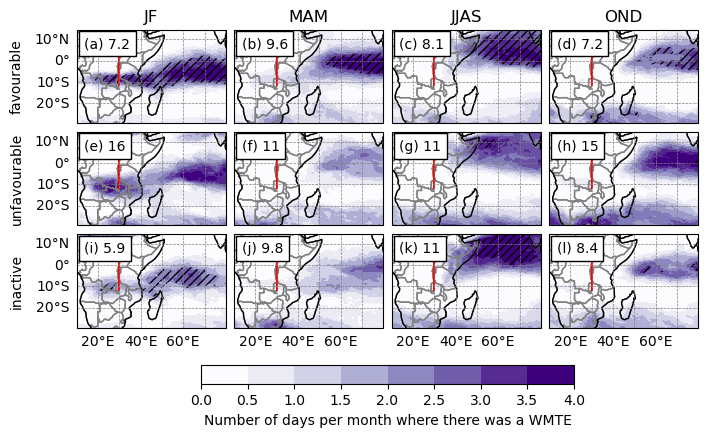

In [7]:
# Plot options
mode = "Total" # Frac or Total
print(f"Plotting mode: {mode}")

if mode == "Frac":
    levels = np.arange(0,0.55,0.05) 
    cbarLabel = "Fraction of days where there was a WMTE"
elif mode == "Total":
    levels = np.arange(0,4.5,0.5) # cmap levels
    cbarLabel = "Number of days per month where there was a WMTE"

else:
    raise ValueError("Invalid value passed to 'mode'. Expected 'Frac' or 'Total'")

letters = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]

# Where to save figure
figSaveLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/westerlyDays{mode}.{years[0]}.{years[-1]}"

figsize = (17.7,10.7) # fig size in cm
dpi = 300 # For saving
cmap = plt.get_cmap("Purples") # cmap

# Plot area
extent = [10,80,12,-25]

cmPerInch = 2.54

# Draw the plot
fig,axs = tct.new_map_axes(nrows=3,ncols=4,figsize=(figsize[0] / cmPerInch, figsize[1] / cmPerInch) ,gridlines=False)

for seasonix , season in enumerate(seasons):
    # Data selection
    seasonLabel = seasonLabels[seasonix]

    seasonData = seasonFracs[seasonLabel]
    nclasses = len(seasonData["MJO_class"])
    nmonths = len(season)

    for classix, className in enumerate(seasonData["MJO_class"].values):
        print(f"Plotting season {seasonLabel} mjo class {className}")

        data = seasonData.isel(MJO_class=classix)
        seasonClassNumberDays = seasonTotals[seasonLabel][className] # number of days in that class and season

        seasonClassNumberDaysPerMonth = seasonClassNumberDays / (nmonths*len(years)) # average number of days in that class and season per month

        if mode == "Frac":
            seasonClassEventsPerMonth = data
        else:

            seasonClassNumberEvents = data  * seasonClassNumberDaysPerMonth # number of events detected at each location

            seasonClassEventsPerMonth = seasonClassNumberEvents # / (nmonths*len(years)) # average number of events detected at each location per month

        ax = axs[classix,seasonix]
        
        # Plot the data
        im=seasonClassEventsPerMonth.plot.contourf(ax=ax,add_colorbar=False,levels=levels,cmap=cmap)
        data.plot.contourf(ax=ax,add_colorbar=False,levels=[0,1/3],alpha=0,hatches=[None,"////"])
    
        # Decorating
        # ax.set_title(seasonLabel)
        ax.set_extent(extent)

        ax.text(0.05,0.85,f"({letters[seasonix+classix*4]}) {seasonClassNumberDaysPerMonth:1.2g}",transform=ax.transAxes,ha="left",va="center",bbox=dict(facecolor='white', edgecolor='black'))#, boxstyle='round,pad=1'))


        # Add gridlines with labels only on the outer subplots
        gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), color='gray', linestyle='--', linewidth=0.5)
        i=seasonix
        # Configure which gridline labels appear based on subplot position
        if seasonix != 0:  # left labels only on left most plots
            gl.left_labels = False
        if classix != nclasses-1:  # bottom labels only on lower plots
            gl.bottom_labels = False
        # Turn off all top and right labels
        gl.right_labels = False
        gl.top_labels = False

        if classix == 0:
            ax.set_title(seasonLabel)
        else:
            ax.set_title(None)

        if seasonix == 0:
            ax.text(-0.4,0.5,className,ha="center",va="center",transform=ax.transAxes,rotation=90)

        
        ax.vlines(lon,latMin,latMax,color="red")
        

#     # Additional adjustments (optional, for finer control)
#     gl.xlabel_style = {'size': 10, 'color': 'black'}
#     gl.ylabel_style = {'size': 10, 'color': 'black'}

fig.colorbar(im,label=cbarLabel,ax=axs,shrink=0.6,orientation="horizontal")

# Add abcd labels
# tct.add_labels(axs,0.03,0.85,fontweight="bold")

# print(f"Saving to {figSaveLoc}")
# plt.savefig(f"{figSaveLoc}.pdf",dpi=dpi,bbox_inches='tight')
# plt.savefig(f"{figSaveLoc}.tif",dpi=dpi,bbox_inches='tight')